In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Strains and even IDs in metadata are dublicated. But for this analysis it doesn't matter, we want only date, not patient info, that could be different in dublicates by strain.  
Thus, we drop dublicates by strains

In [46]:
path_to_mut = "../data/mutation_dists.csv"
path_to_metadata = "../data/gisaid/metadata_clean.csv"

df = pd.read_csv(path_to_mut)
meta = pd.read_csv(path_to_metadata, parse_dates=[2])
meta = meta.drop_duplicates("strain")

In [36]:
df.head()

,mut_id,pos,parent_nucl,child_nucl,parent_nucl_context,child_nucl_context,parent_node,child_node,phylo_dist,topology_dist
0,0,1086,G,A,gtGtt,gtAtt,#54520#,#54519#,0.1,0
1,1,3676,T,C,atTtt,atCtt,#54520#,#54519#,0.1,0
2,2,7118,C,T,ttCta,ttTta,#54520#,#54519#,0.1,0
3,3,9564,C,T,ttCtt,ttTtt,#54520#,#54519#,0.1,0
4,4,10322,A,G,taAgg,taGgg,#54520#,#54519#,0.1,0


In [39]:
meta.head(2)

,strain,gisaid_epi_isl,date,region,country,length,age,sex,pangolin_lineage,GISAID_clade,originating_lab,date_submitted
0,hCoV-19/Wuhan/IVDC-HB-01/2019,EPI_ISL_402119,2019-12-30,Asia,China,29891,49,Female,B,L,National Institute for Viral Disease Control a...,2020-01-10
1,hCoV-19/Wuhan/IVDC-HB-04/2020,EPI_ISL_402120,2020-01-01,Asia,China,29896,61,Male,B,L,National Institute for Viral Disease Control a...,2020-01-11


In [47]:
dates = meta[["strain", "date"]]

In [52]:
merged = pd.merge(df, dates, left_on="child_node", right_on="strain")
merged.drop("strain", axis=1, inplace=True)
merged.head(2)

,mut_id,pos,parent_nucl,child_nucl,parent_nucl_context,child_nucl_context,parent_node,child_node,phylo_dist,topology_dist,date
0,14,3676,C,T,atCtt,atTtt,#54519#,hCoV-19/England/MILK-B97003/2020,0.2,1,2020-11-13
1,15,7118,T,C,ttTta,ttCta,#54519#,hCoV-19/England/MILK-B97003/2020,0.2,1,2020-11-13


In [53]:
df[~df.child_node.str.startswith("#")].shape, merged.shape

((667153, 10), (667153, 11))

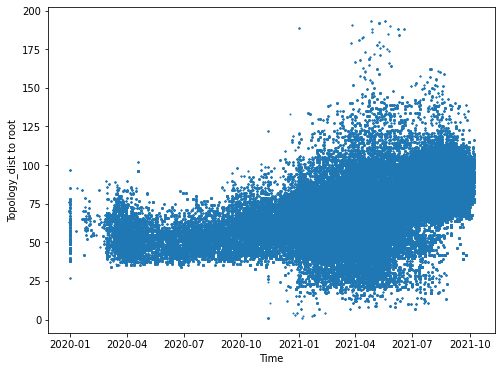

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(merged.date, merged.topology_dist, s=1)
plt.xlabel("Time")
plt.ylabel("Topology_dist to root")
plt.show()

### Bad result I think. Need to look at number of mutations on edges

In [66]:
df.child_node.nunique()

107640

In [69]:
df.head()

,mut_id,pos,parent_nucl,child_nucl,parent_nucl_context,child_nucl_context,parent_node,child_node,phylo_dist,topology_dist
0,0,1086,G,A,gtGtt,gtAtt,#54520#,#54519#,0.1,0
1,1,3676,T,C,atTtt,atCtt,#54520#,#54519#,0.1,0
2,2,7118,C,T,ttCta,ttTta,#54520#,#54519#,0.1,0
3,3,9564,C,T,ttCtt,ttTtt,#54520#,#54519#,0.1,0
4,4,10322,A,G,taAgg,taGgg,#54520#,#54519#,0.1,0


In [74]:
gr = df.groupby("child_node")
gr_snp = df[(df.parent_nucl != '-') & (df.child_nucl != '-')].groupby("child_node")
gr_indel = df[(df.parent_nucl == '-') | (df.child_nucl == '-')].groupby("child_node")

<AxesSubplot:>

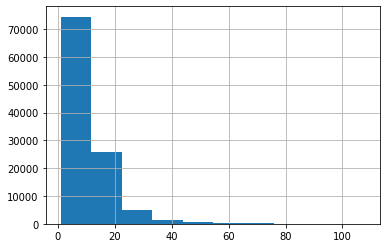

In [76]:
gr.size().hist()

<AxesSubplot:>

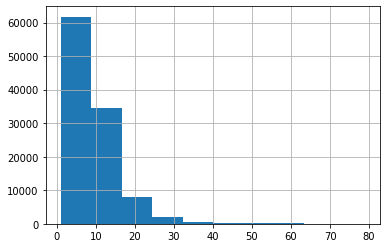

In [77]:
gr_snp.size().hist()

<AxesSubplot:>

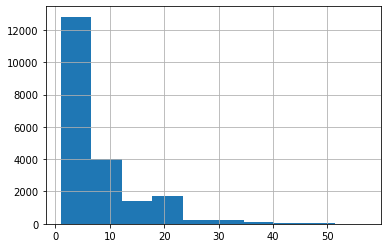

In [78]:
gr_indel.size().hist()